
# ✈️ **INTRODUCTION**

---

For this project, the **Airline Passenger Satisfaction** dataset is used. You can find the original dataset on Kaggle [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data).

## 📊 **Dataset Selection & Description**

I chose this dataset because I found its structure clearer and easier to understand. The column names were familiar (age, gender, flight distance, etc.), and the goal — to understand whether passengers were satisfied or not — seemed more straightforward. It felt like a good starting point to learn data analysis without needing advanced cleaning or domain knowledge.

## 📋 **Project Objectives**
* Dataset Selection and Setup

* Statistical Summary

* Missing Data Analysis

* Outlier Detection

* Visualization



## 📥 **Dataset Selection and Setup**


In [818]:
import kagglehub
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
print("Path to dataset files:", path)

import pandas as pd
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')

df = pd.concat([train, test], ignore_index=True)

Path to dataset files: /kaggle/input/airline-passenger-satisfaction



## 📊 **Statistical Summary**


In [819]:
print("="*13)
print("DATASET INFO:")
print("="*13)
df.info()

print()

print("="*20)
print("STATISTICAL SUMMARY:")
print("="*20)
df.describe()

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location            

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [820]:
# Shows all values in each categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(f"{df[col].value_counts().to_string().upper()}\n")

GENDER
FEMALE    65899
MALE      63981

CUSTOMER TYPE
LOYAL CUSTOMER       106100
DISLOYAL CUSTOMER     23780

TYPE OF TRAVEL
BUSINESS TRAVEL    89693
PERSONAL TRAVEL    40187

CLASS
BUSINESS    62160
ECO         58309
ECO PLUS     9411

SATISFACTION
NEUTRAL OR DISSATISFIED    73452
SATISFIED                  56428



In [821]:
# Most common passenger age
print("Most common passenger age:", df['Age'].mode()[0])

# Number of passengers under 18
print("Number of passengers under 18:", len(df[df['Age'] < 18]))

# Number of senior passengers (over65)
print("Number of senior passengers:", len(df[df['Age'] > 65]))

Most common passenger age: 39
Number of passengers under 18: 9847
Number of senior passengers: 5045



### 🧹 **Cleaning Data**


In [822]:
# Unnamed and id are not needed
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)


## 🔍 **Missing Data Analysis**


In [823]:
# Number of missing values
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0



### 🛠️ **Handling Missing Data**


In [824]:
# Create a boolean flag to track which values were originally missing
df['Arrival_Delay_Missing'] = df['Arrival Delay in Minutes'].isnull()

In [825]:
# Fill missing values with the median (0.0 minutes)
df.fillna({'Arrival Delay in Minutes': df['Arrival Delay in Minutes'].median()}, inplace=True)

In [826]:
print(f"Imputed {df['Arrival_Delay_Missing'].sum()} missing values")
print(f"Median used for imputation: {df['Arrival Delay in Minutes'].median()} minutes") # The median of 0.0 indicates that at least 50% of flights had no arrival delay.

Imputed 393 missing values
Median used for imputation: 0.0 minutes


In [827]:
df.info() # double checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298


## 🚨 **Outlier Detection**


In [828]:
# Checking Outlier in Rating Columns

rating_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

melted = pd.DataFrame()

for col in rating_columns:
    counts = df[col].value_counts().sort_index()
    counts.name = col
    melted = pd.concat([melted, counts], axis=1)

display(melted.fillna(0).astype(int))


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3916,6681,5682,1,132,3080,1,18,5,598,0,1,5,14
1,22328,19409,21886,21991,16051,13261,15108,15675,14787,12895,9028,16108,8862,16729
2,32320,21534,30051,24296,27383,21934,18529,21968,18351,24540,14362,16102,14308,20113
3,32185,22378,30393,35717,27794,27117,23328,23884,28542,25056,25851,35453,25316,30639
4,24775,31880,24444,30466,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969
5,14356,27998,17424,17409,27957,26020,33158,31544,29492,30905,33878,25883,34066,28416


In [838]:
# Using Interquartile Range (IQR) (Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes)

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] < lower_limit) | (df[column] > upper_limit)]

for col in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col.upper()}:")
    print("="*40)
    print(outliers[col].describe().to_string())
    print()

Outliers in AGE:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN

Outliers in FLIGHT DISTANCE:
count    2855.000000
mean     3890.066200
std       157.871581
min      3740.000000
25%      3804.000000
50%      3872.000000
75%      3938.000000
max      4983.000000

Outliers in DEPARTURE DELAY IN MINUTES:
count    18098.000000
mean        82.624544
std         68.818185
min         31.000000
25%         42.000000
50%         60.000000
75%         97.000000
max       1592.000000

Outliers in ARRIVAL DELAY IN MINUTES:
count    17492.000000
mean        85.486165
std         69.705603
min         33.000000
25%         44.000000
50%         62.000000
75%        101.000000
max       1584.000000



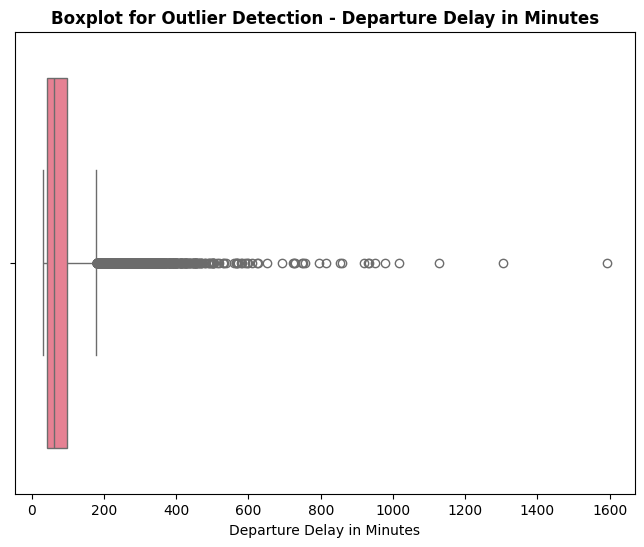

In [830]:
# Visualizing Outliers Using Boxplot - Departure Delay
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
outliers = detect_outliers(df, 'Departure Delay in Minutes')
sns.boxplot(x=outliers['Departure Delay in Minutes'])
plt.title("Boxplot for Outlier Detection - Departure Delay in Minutes", fontweight = 'bold')
plt.show()

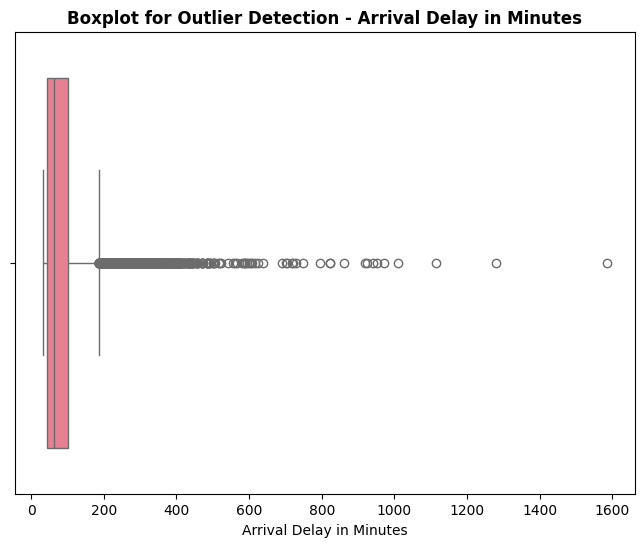

In [831]:
# Visualizing Outliers Using Boxplot - Arrival Delay
plt.figure(figsize=(8, 6))
outliers = detect_outliers(df, 'Arrival Delay in Minutes')
sns.boxplot(x=outliers['Arrival Delay in Minutes'])
plt.title("Boxplot for Outlier Detection - Arrival Delay in Minutes", fontweight = 'bold')
plt.show()



## 📉 **Visualization**


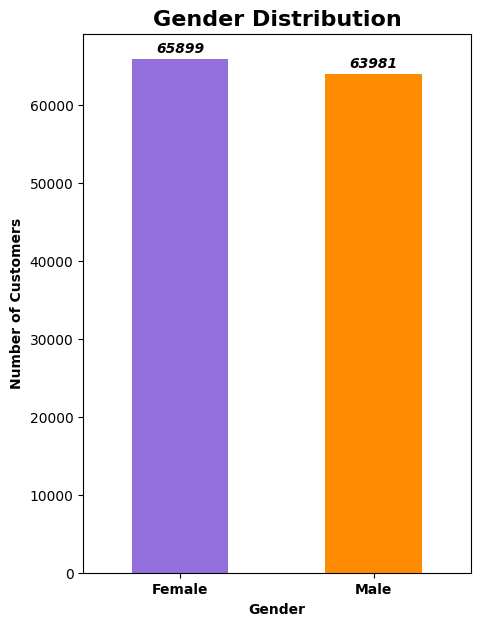

In [832]:
# Gender Distribution
ax = df['Gender'].value_counts().plot(kind='bar', figsize=(5, 7), color=['mediumpurple', 'darkorange'])
plt.title('Gender Distribution', fontweight='bold', fontsize=16)
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')

for i, v in enumerate(df['Gender'].value_counts().values):
    ax.text(i, v + 500, str(v), ha='center', va='bottom', fontstyle='italic', fontweight='bold')

plt.show()

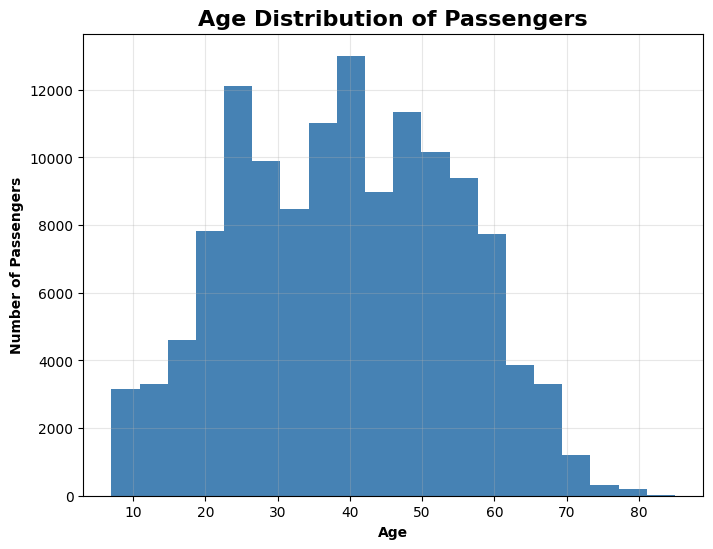

In [833]:
# Age Distribution
df['Age'].plot(kind='hist', bins=20, figsize=(8, 6), color='steelblue')
plt.title('Age Distribution of Passengers', fontweight='bold', fontsize=16)
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number of Passengers', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

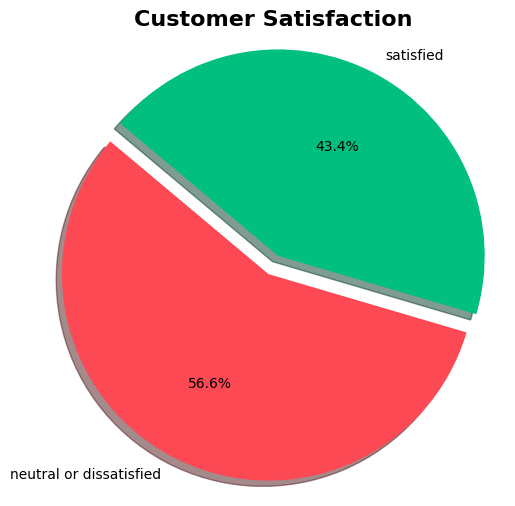

In [834]:
# Customer Satisfaction
satisfaction_counts = df['satisfaction'].value_counts()
labels = satisfaction_counts.index
sizes = satisfaction_counts.values
colors = ['#FD4954','#01BF7F']
explode = [0.05, 0.05]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    colors=colors
)
plt.title('Customer Satisfaction', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

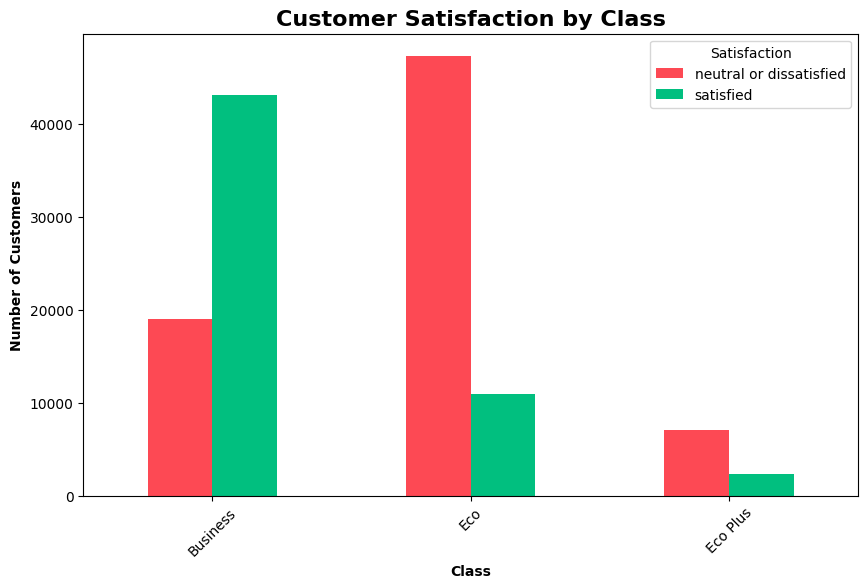

In [835]:
# Satisfaction Across Different Classes
df.groupby('Class')['satisfaction'].value_counts().unstack().plot(kind='bar', figsize=(10, 6), color = ['#FD4954', '#01BF7F'])

plt.title('Customer Satisfaction by Class', fontweight='bold', fontsize=16)
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.legend(title='Satisfaction')
plt.xticks(rotation=45)
plt.show()

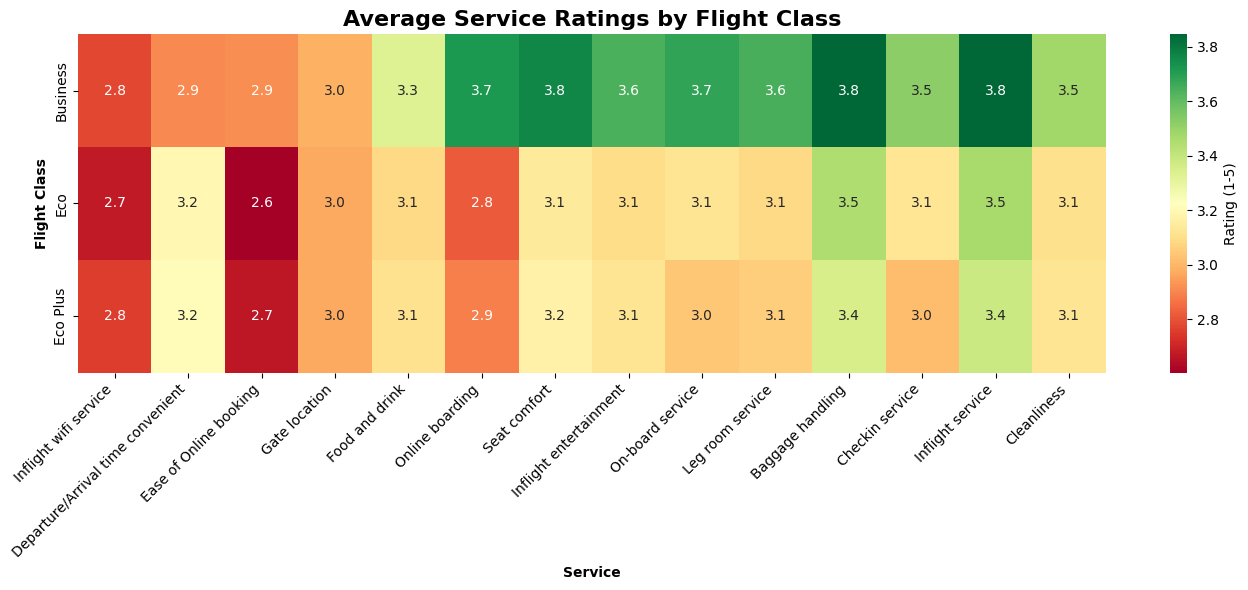

In [836]:
# Average Service Ratings by Flight Class

services = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

heatmap_df = pd.DataFrame()

for class_type in ['Business', 'Eco', 'Eco Plus']:
    class_data = df[df['Class'] == class_type][services].mean()
    heatmap_df[class_type] = class_data

heatmap_df = heatmap_df.T

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_df,
            annot=True,
            fmt='.1f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Rating (1-5)'})

plt.title('Average Service Ratings by Flight Class', fontweight='bold', fontsize=16)
plt.xlabel('Service', fontweight='bold')
plt.ylabel('Flight Class', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

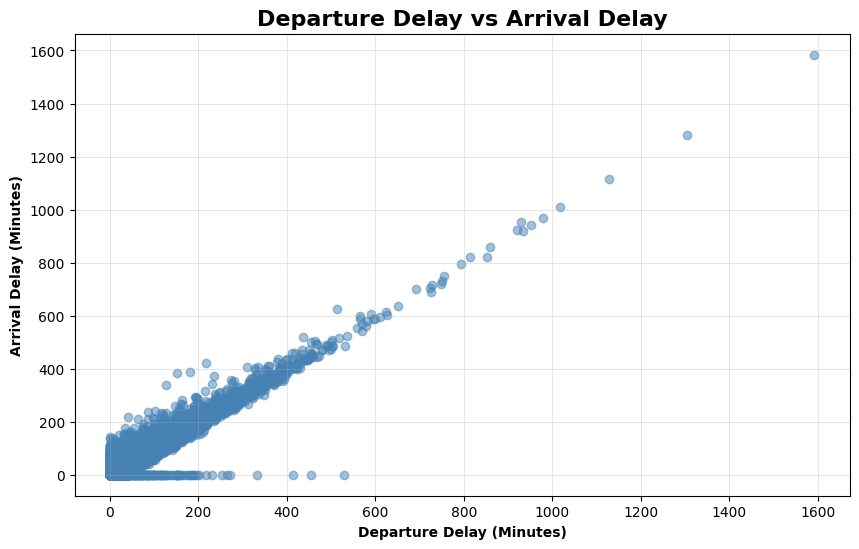

In [837]:
# Departure Delay vs Arrival Delay (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], alpha=0.5, color='steelblue')
plt.title('Departure Delay vs Arrival Delay', fontweight='bold', fontsize=16)
plt.xlabel('Departure Delay (Minutes)', fontweight='bold')
plt.ylabel('Arrival Delay (Minutes)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


### **CONCLUSION** ✈️
This project analyzed the Airline Passenger Satisfaction dataset to uncover key insights into passenger demographics, service ratings, delays, and satisfaction levels. The data showed that most passengers were adults, with a small percentage under 18 or over 65. Ratings were mostly within the expected 1–5 range, though significant outliers existed in delay-related fields.

# **Data Quality and Outlier Analysis** 🔍

Outlier analysis was conducted across four key categories: Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes. The results revealed interesting patterns in data quality and operational challenges.
Age showed no outliers, indicating reliable demographic data collection. Flight Distance identified 2,855 potential outliers, but with a mean distance of 3,890 miles—typical for international flights—these values represent legitimate long-haul routes rather than data errors.

However, delay data revealed significant operational issues. Departure delays contained 18,098 outliers, while arrival delays had 17,492 outliers. The most extreme cases were concerning: the longest departure delay reached 1,592 minutes (26.5 hours), and the longest arrival delay was 1,584 minutes (26.4 hours). These extreme delays suggest serious operational disruptions affecting thousands of passengers. Missing values in "Arrival Delay in Minutes" were minimal and successfully imputed using the median.

#**Key Findings** 📊

Visualizations revealed a fairly balanced gender distribution and satisfaction levels leaning slightly positive, with notably higher satisfaction rates among Business class passengers. Heatmaps showed that Business class consistently rated services higher than Economy and Eco Plus across all service categories, highlighting a clear service quality gap between passenger classes.
Most importantly, departure delays were moderately correlated with arrival delays, showing that when flights leave late, they tend to arrive late too. This suggests that fixing departure timing issues could improve overall flight performance.

#**Final Thoughts** 💭

This analysis provides a strong foundation for further customer experience improvements, particularly focusing on Economy class service enhancement and operational delay reduction strategies.
